## Various analyses / metrics for single units

In [4]:
#Import packages
import pandas as pd
import h5py
import numpy as np
import scipy as sp
import scipy.signal as sg
import scipy.stats as st
import statsmodels.stats.multitest as stmulti
import xarray as xr
import os
import matplotlib.pyplot as plt
from matplotlib import patches
import ast
import glob

from DR_analysis_utils import Session, makePSTH, make_neuron_time_trials_tensor, compute_smoothed_response_rate

%matplotlib notebook

In [5]:
#Set paths to experiment folders
main_path = [
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-07-26_14-09-36_620263\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-07-27_13-57-17_620263\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-08-02_15-40-19_620264\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-09-19_13-48-26_628801\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-09-26_12-48-09_636397\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-09-27_11-37-08_636397\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-12-05_13-08-02_644547\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-12-06_12-35-35_644547\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2023-01-17_11-39-17_646318\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2023-01-18_10-44-55_646318\processed",
    r"Y:\2023-02-27_08-14-30_649944\processed",
    r"Y:\2023-02-28_09-33-43_649944\processed",
    # DR mice
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220815\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220816\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220817\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230123\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230124\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230125\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230126\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230130\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230131\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230201\processed", 
    r"\\allen\programs\mindscope\workgroups\np-exp\PilotEphys\Task 2 pilot\DRpilot_644864_20230202\processed",
    r"\\allen\programs\mindscope\workgroups\np-exp\PilotEphys\Task 2 pilot\DRpilot_644866_20230207\processed", 
    r"Y:\DRpilot_644866_20230208\processed",
    r"Y:\DRpilot_644866_20230209\processed",
    r"Y:\DRpilot_644866_20230210\processed",
    r"Y:\DRpilot_644867_20230220\processed",
    r"Y:\DRpilot_644867_20230221\processed",
    r"Y:\DRpilot_644867_20230222\processed",
    r"Y:\DRpilot_644867_20230223\processed",
    r"Y:\DRpilot_649943_20230213\processed", 
    r"Y:\DRpilot_649943_20230214\processed",
    r"Y:\DRpilot_649943_20230215\processed",
    r"Y:\DRpilot_649943_20230216\processed",
    
]

mouseIDs = ['620263','620263','620264','628801','636397','636397','644547','644547',
            '646318','646318','649944','649944',
           #DR mice
            '626791','626791','626791',
            '636766','636766','636766','636766',
            '644864','644864','644864','644864',
            '644866','644866','644866','644866',
            '644867','644867','644867','644867',
            '649943','649943','649943','649943',]
exp_nums = [1,2, 1, 1, 1,2, 1,2, 
            1,2, 1,2, 
           #DR mice
            1,2,3,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,]

### Load/initialize data from one session

In [6]:
sel_session=20
session=Session(path=main_path[sel_session]) 
session.assign_unit_areas()
session =  compute_smoothed_response_rate(session)

probeA areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials[ss+'_smooth']=sg.convolve(stimTrials['trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials[ss+'_smooth']=sg.convolve(stimTrials['trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\

In [7]:
print(session.metadata['mouseID']+' session ',session.metadata['ephys_session_num'])

644864 session  2


In [8]:
# trials table
session.trials

,trialStartFrame,trialStimID,trialstimRewarded,trial_response,trial_rewarded,trial_sound_dur,trial_vis_stim_dur,vis_go_trials,vis_nogo_trials,vis_hit_trials,...,stimLatency,trial_stim_dur,avg_run_speed,sound1_interp,vis1_interp,sound2_interp,vis2_interp,catch_interp,cross_modal_dprime,intra_modal_dprime
0,0,sound1,sound1,True,True,0.5,0.0,False,False,False,...,0.035833,0.5,24.168865,0.546012,NaN,NaN,NaN,NaN,NaN,NaN
1,548,sound1,sound1,True,True,0.5,0.0,False,False,False,...,0.070458,0.5,30.429345,0.636215,NaN,NaN,NaN,NaN,NaN,NaN
2,941,sound1,sound1,True,True,0.5,0.0,False,False,False,...,0.062312,0.5,26.707950,0.721164,NaN,NaN,NaN,NaN,NaN,NaN
3,1276,sound1,sound1,True,True,0.5,0.0,False,False,False,...,0.057562,0.5,25.948881,0.798030,NaN,NaN,NaN,NaN,NaN,NaN
4,1618,sound1,sound1,True,True,0.5,0.0,False,False,False,...,0.059437,0.5,27.454152,0.864853,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,214645,sound1,vis1,True,False,0.5,0.0,False,False,False,...,0.065417,0.5,26.273729,NaN,0.664531,NaN,0.266038,NaN,NaN,1.049703
511,215017,vis1,vis1,True,True,0.0,0.5,True,False,True,...,0.022340,0.5,30.669176,NaN,0.636215,NaN,0.265810,NaN,NaN,0.973895
512,215462,vis1,vis1,True,True,0.0,0.5,True,False,True,...,0.022595,0.5,35.368451,NaN,NaN,NaN,0.265582,NaN,NaN,NaN
513,215858,vis2,vis1,False,False,0.0,0.5,False,True,False,...,0.022595,0.5,34.792502,NaN,NaN,NaN,0.265354,NaN,NaN,NaN


In [9]:
# units table
session.units

,quality,cluster_id,probe,firing_rate,presence_ratio,isi_viol,num_viol,amplitude_cutoff,isolation_distance,contam_rate,...,velocity_above,velocity_below,epoch_name,area,AP_coord,DV_coord,ML_coord,AP_coords,DV_coords,ML_coords
id,,,,,,,,,,,,,,,,,,,,,
2301311510000,good,0,A,8.896323,0.99,0.076868,100.0,0.098966,33.521169,16.394114,...,0.343384,NaN,complete_session,CL,NaN,NaN,NaN,280.0,126.0,195.0
2301311510001,good,1,A,4.786097,0.99,0.194890,64.0,0.500000,23.487278,19.947465,...,0.412060,-0.686767,complete_session,CL,NaN,NaN,NaN,280.0,126.0,195.0
2301311510002,good,2,A,14.764308,0.99,0.089405,316.0,0.135428,30.856933,33.068057,...,0.343384,NaN,complete_session,CL,NaN,NaN,NaN,280.0,126.0,195.0
2301311510003,good,3,A,17.289400,0.99,1.000000,1342.0,0.113632,67.288826,110.930459,...,0.686767,NaN,complete_session,CL,NaN,NaN,NaN,280.0,126.0,195.0
2301311510004,good,4,A,2.594512,0.99,0.197535,19.0,0.071202,23.415300,2.959310,...,1.373534,0.000000,complete_session,CL,NaN,NaN,NaN,280.0,126.0,195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301311560549,good,549,F,0.112063,0.68,1.000000,1.0,0.078335,17.796670,1.171530,...,0.686767,0.745633,complete_session,MOs5,NaN,NaN,NaN,154.0,87.0,163.0
2301311560550,good,550,F,0.108355,0.19,0.000000,0.0,0.000492,62.464968,0.000000,...,1.030151,-0.343384,complete_session,MOs2/3,NaN,NaN,NaN,150.0,72.0,159.0
2301311560551,good,551,F,1.167801,0.83,0.090563,2.0,0.002117,46.211298,0.337940,...,0.274707,-0.412060,complete_session,MOs2/3,NaN,NaN,NaN,148.0,66.0,158.0


In [10]:
# spike times from one unit
session.spike_times[session.units.index[0]]

array([  17.27199945,   17.41843232,   17.67559818, ..., 4870.69235984,
       4871.29925792, 4871.35155776])

In [11]:
# information about each frame
session.frames

,vsyncTimes,frameDelay,runningSpeed
0,1030.21298,0.020810,0.000000
1,1030.22939,0.020810,25.899732
2,1030.24633,0.022400,26.115563
3,1030.26290,0.022400,25.899732
4,1030.27942,0.022515,25.899732
...,...,...,...
217259,4675.73856,0.022025,0.000000
217260,4675.75475,0.022490,0.431662
217261,4675.77149,0.022490,2.805804
217262,4675.78857,0.022260,3.021635


In [12]:
session.rf_trials

,trialsX,trialsY,trialGratingOri,stimStartFrame,trialAMNoiseFreq,trialToneFreq,trialFullFieldContrast,trialStimType,stimStartTime,stimLatency
0,479.233652,-438.722753,270.0,0,NaN,NaN,NaN,vis,79.175955,0.020685
1,-159.744551,146.240918,0.0,31,NaN,NaN,NaN,vis,79.693165,0.020685
2,159.744551,438.722753,315.0,62,NaN,NaN,NaN,vis,80.211800,0.022430
3,-159.744551,-438.722753,90.0,93,NaN,NaN,NaN,vis,80.728900,0.022430
4,479.233652,-438.722753,135.0,124,NaN,NaN,NaN,vis,81.246080,0.022500
...,...,...,...,...,...,...,...,...,...,...
1651,-479.233652,-438.722753,45.0,51181,NaN,NaN,NaN,vis,936.490650,0.022560
1652,-479.233652,146.240918,225.0,51212,NaN,NaN,NaN,vis,937.007525,0.022565
1653,479.233652,438.722753,135.0,51243,NaN,NaN,NaN,vis,937.524725,0.022565
1654,NaN,NaN,NaN,51274,NaN,12000.0,NaN,sound,938.087616,0.068396


### Create a convenient data array using "xarray"

In [13]:
# loop through sessions and make unit xarrays
time_before_flash = 0.5
trial_duration = 2
bin_size = 0.001


# Make tensor (3-D matrix [units,time,trials])
trial_tensor = make_neuron_time_trials_tensor(session.good_units, session.spike_times, 
                                              session.trials,time_before_flash, trial_duration, 
                                              bin_size)

# make xarray
session.trial_da = xr.DataArray(trial_tensor, dims=("unit_id", "time", "trials"), 
                           coords={
                               "unit_id": session.good_units.index.values,
                               "time": np.arange(0, trial_duration, bin_size)-time_before_flash,
                               "trials": session.trials.index.values
                               })

### compute single unit metrics

In [115]:
# responsiveness to each stimulus

# define time window (0-100ms?)
prestim_win = [-0.2,0.0]
stim_win = [0.0,0.2]

# sum spikes in these time windows
pre_stim_response_da = session.trial_da.sel(time=slice(prestim_win[0],prestim_win[1])).mean(dim='time')
stim_response_da = session.trial_da.sel(time=slice(stim_win[0],stim_win[1])).mean(dim='time')

# record the mean change (and sign)
stim_evoked=stim_response_da-pre_stim_response_da

n_units=len(session.good_units)

stim_response_p={}
stim_response_p_adj={}
stim_response_avg={}
stimuli = session.trials['trialStimID'].unique()
# stimuli = ['vis1','vis2','sound1','sound2','catch']
for stim in stimuli:
    stim_response_p[stim]=np.zeros((n_units))
    stim_response_p[stim][:]=np.nan
    stim_response_p_adj[stim]=np.zeros((n_units))
    stim_response_p_adj[stim][:]=np.nan
    stim_response_avg[stim]=np.zeros((n_units))
    stim_response_avg[stim][:]=np.nan
    
all_pvals=[]
all_stim_ind=[]
#loop through stimuli
for stim_ind,stim in enumerate(stimuli):
    stim_trials = session.trials.query('trialStimID == @stim and \
                                        aud_autoreward_trials == False and \
                                        vis_autoreward_trials == False').index
    
    for ui,unit_sel in enumerate(session.good_units.index):
        
        # statistical test pre vs. stim FR
        pre_stim_sel_unit = pre_stim_response_da.sel(unit_id=unit_sel,trials=stim_trials)
        stim_sel_unit = stim_response_da.sel(unit_id=unit_sel,trials=stim_trials)
        
        if np.all((stim_sel_unit.values-pre_stim_sel_unit.values)!=0):
            h,stim_response_p[stim][ui]=st.wilcoxon(pre_stim_sel_unit.values,stim_sel_unit.values)
        else:
            stim_response_p[stim][ui]=1
            
        stim_response_avg[stim][ui]=(np.nanmean(stim_sel_unit.values-pre_stim_sel_unit.values)/
                                     np.nanstd(pre_stim_sel_unit.values))
        
    all_pvals.append(stim_response_p[stim])
    all_stim_ind.append(np.ones(len(stim_response_p[stim]))*stim_ind)
    
########
# keep track of how many tests, do multiple comparisons corrections
all_pvals=np.hstack(all_pvals)
all_stim_ind=np.hstack(all_stim_ind)
hyp_test,adj_pvals=stmulti.fdrcorrection(all_pvals,alpha=0.05,method='indep')  
# translate back to lists for each stimulus

for stim_ind,stim in enumerate(stimuli):
    stim_response_p_adj[stim]=adj_pvals[all_stim_ind==stim_ind]

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_44952\201632865.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  stim_response_avg[stim][ui]=(np.nanmean(stim_sel_unit.values-pre_stim_sel_unit.values)/
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_44952\201632865.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  stim_response_avg[stim][ui]=(np.nanmean(stim_sel_unit.values-pre_stim_sel_unit.values)/
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_44952\201632865.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  stim_response_avg[stim][ui]=(np.nanmean(stim_sel_unit.values-pre_stim_sel_unit.values)/
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_44952\201632865.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  stim_response_avg[stim][ui]=(np.nanmean(stim_sel_unit.values-pre_stim_sel_unit.values)/
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_44952\201632865.py:48: RuntimeWarning: divid

In [72]:
# adj_pvals
# stim_evoked.values
# stim_sel_unit.values-pre_stim_sel_unit.values

# np.all((stim_sel_unit.values-pre_stim_sel_unit.values)!=0)

In [117]:
unit_selectivity=pd.DataFrame(stim_response_p_adj,columns=['vis1','vis2','sound1','sound2','catch'])<0.05
unit_selectivity

,vis1,vis2,sound1,sound2,catch
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
766,False,False,False,False,False
767,False,False,False,False,False
768,False,False,False,False,False
769,False,False,False,False,False


<IPython.core.display.Javascript object>


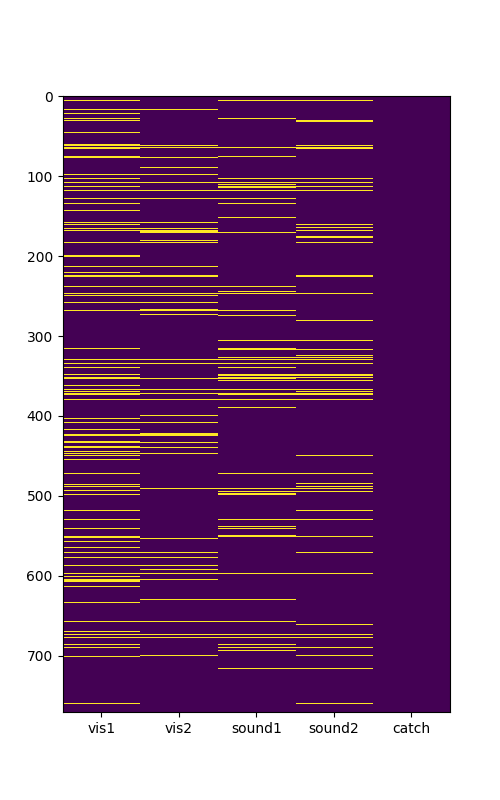

[Text(0, 0, 'vis1'),
 Text(1, 0, 'vis2'),
 Text(2, 0, 'sound1'),
 Text(3, 0, 'sound2'),
 Text(4, 0, 'catch')]

In [118]:
fig,ax=plt.subplots(1,1,figsize=(5,8))
ax.imshow(unit_selectivity,aspect='auto',vmin=0,vmax=1,interpolation='none')
ax.set_xticks(np.arange(0,len(stimuli)))
ax.set_xticklabels(['vis1','vis2','sound1','sound2','catch'])

<IPython.core.display.Javascript object>


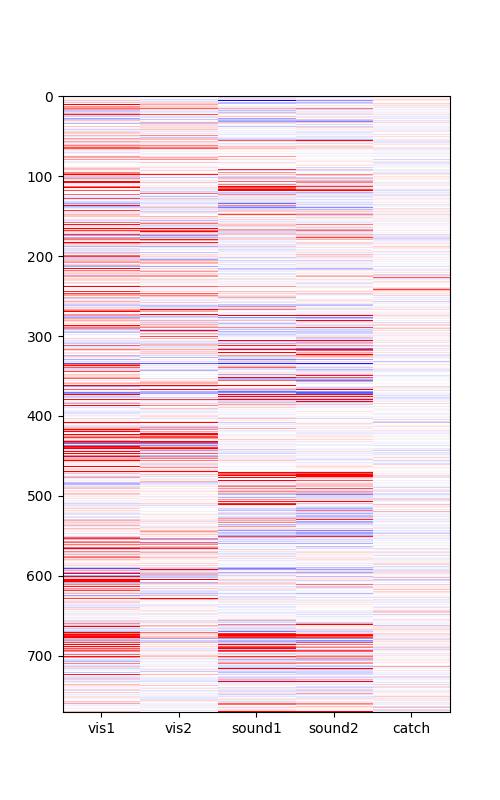

[Text(0, 0, 'vis1'),
 Text(1, 0, 'vis2'),
 Text(2, 0, 'sound1'),
 Text(3, 0, 'sound2'),
 Text(4, 0, 'catch')]

In [120]:
unit_response = pd.DataFrame(stim_response_avg,columns=['vis1','vis2','sound1','sound2','catch'])
fig,ax=plt.subplots(1,1,figsize=(5,8))
ax.imshow(unit_response,aspect='auto',cmap='bwr',vmin=-2,vmax=2,interpolation='none')
ax.set_xticks(np.arange(0,len(stimuli)))
ax.set_xticklabels(['vis1','vis2','sound1','sound2','catch'])

<IPython.core.display.Javascript object>


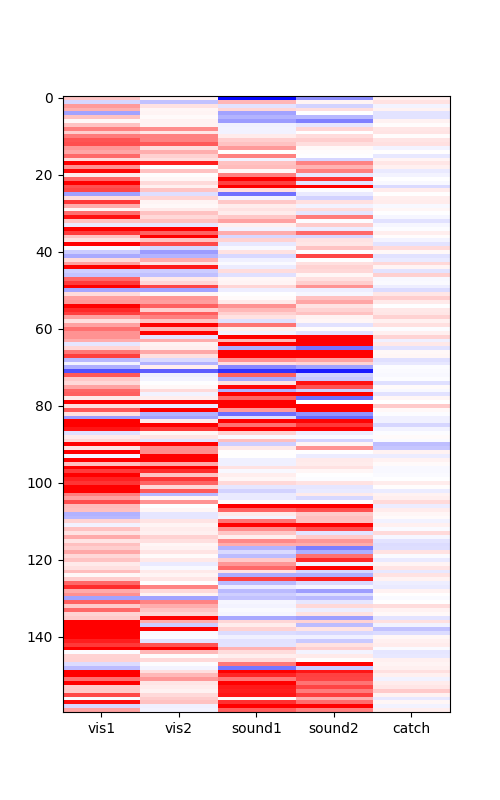

[Text(0, 0, 'vis1'),
 Text(1, 0, 'vis2'),
 Text(2, 0, 'sound1'),
 Text(3, 0, 'sound2'),
 Text(4, 0, 'catch')]

In [131]:
unit_response = pd.DataFrame(stim_response_avg,columns=['vis1','vis2','sound1','sound2','catch'])
fig,ax=plt.subplots(1,1,figsize=(5,8))
ax.imshow(unit_response.values[sig_evoked,:],aspect='auto',cmap='bwr',vmin=-2,vmax=2,interpolation='none')
ax.set_xticks(np.arange(0,len(stimuli)))
ax.set_xticklabels(['vis1','vis2','sound1','sound2','catch'])

<IPython.core.display.Javascript object>


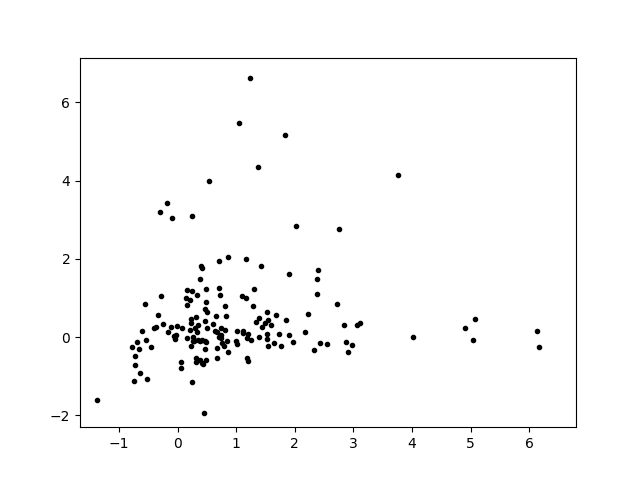

In [133]:
sig_evoked=np.any(unit_selectivity.values,axis=1)
fig,ax=plt.subplots(1,1)
ax.plot(unit_response['vis1'].iloc[sig_evoked],unit_response['sound1'].iloc[sig_evoked],'k.')

<IPython.core.display.Javascript object>


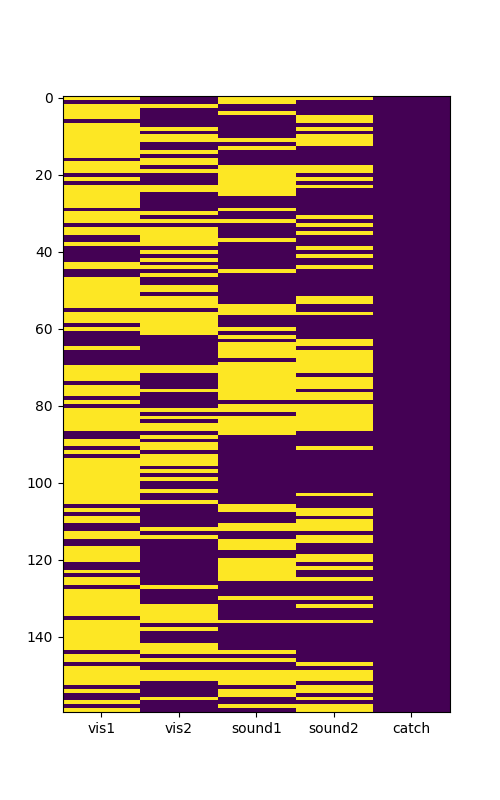

[Text(0, 0, 'vis1'),
 Text(1, 0, 'vis2'),
 Text(2, 0, 'sound1'),
 Text(3, 0, 'sound2'),
 Text(4, 0, 'catch')]

In [130]:
sig_evoked=np.any(unit_selectivity.values,axis=1)
fig,ax=plt.subplots(1,1,figsize=(5,8))
ax.imshow(unit_selectivity.values[sig_evoked,:],aspect='auto',vmin=0,vmax=1,interpolation='none')
ax.set_xticks(np.arange(0,len(stimuli)))
ax.set_xticklabels(['vis1','vis2','sound1','sound2','catch'])

In [129]:
unit_selectivity

,vis1,vis2,sound1,sound2,catch
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
766,False,False,False,False,False
767,False,False,False,False,False
768,False,False,False,False,False
769,False,False,False,False,False


In [134]:
# sig_evoked

In [ ]:
#cluster response types??

In [86]:
pd.DataFrame(stim_response_p_adj)

,sound1,vis1,sound2,vis2,catch
0,1.0,1.000000,1.000000,1.0,1.000000
1,1.0,1.000000,1.000000,1.0,1.000000
2,1.0,1.000000,1.000000,1.0,1.000000
3,1.0,1.000000,1.000000,1.0,1.000000
4,1.0,0.258561,0.187286,1.0,0.236838
...,...,...,...,...,...
766,1.0,1.000000,1.000000,1.0,1.000000
767,1.0,1.000000,1.000000,1.0,1.000000
768,1.0,1.000000,1.000000,1.0,1.000000
769,1.0,1.000000,1.000000,1.0,1.000000


In [ ]:
# block modulation

# define time window: pre stim, early stim, late stim

# define aud vs. vis block trials (or define based on responsiveness?)
    #use the smoothed cross-modal dprime